#**Reading, Displaying, Writing & Resizing an Image using OpenCV**

>[Reading, Displaying, Writing & Resizing an Image using OpenCV](#scrollTo=hPJn3vzunziy)

>>[Reading an Image](#scrollTo=2pW0JoCglh88)

>>[Displaying an image](#scrollTo=ekKW1e1urC3K)

>>[Writing an image](#scrollTo=cqyed5JSfl8T)

>>[Image Resizing](#scrollTo=cxAr015dgGcS)

>>>>[Interpolation](#scrollTo=EyJW3n8DlBcM)

>>>[Resize by specifying new width and height](#scrollTo=asOhLrLu1tVY)

>>>[Resize by Specifying the Scaling Factor](#scrollTo=7MwNEV8cjLtW)

>>[Creating shapes](#scrollTo=ACmvz9F11SWC)



##**Reading an Image**
* Read the image using cv2.imread() function

The python libraries cv2 needed to be imported before reading or displaying an image.

In [1]:
import requests
url = "https://cdn.pixabay.com/photo/2015/11/16/22/14/cat-1046544_960_720.jpg"
r = requests.get(url)
with open('image.jpg', 'wb') as f:
    f.write(r.content) 

import cv2
image= cv2.imread('image.jpg')

##**Displaying an image**
* Display the image using plt.imshow() function

The function `cv2.imshow()` is used to display an image in a window. This function takes 2 arguments. The first argument is the window name (Specify unique window names to display multiple images) and the second argument is the image to be displayed.

All the OpenCV interactive functions won't work in any Jupyter/Colab notebook environment. The function cv2.imshow() opens a window displaying the image and therefore cannot be used in a Colab notebook. So, cv2.imshow() won't be able to use here. Matplotlib is used instead to display image in the notebook. To use Matplotlib, import the matplotlib library.

To hide the tick values on x and y axis, the function plt.axis("off") can be used.

The function plt.imshow() is used to specify the image to be displayed and the function plt.show() is used to display it.

The displayed image won't be as expected. This happens because OpenCV represents RGB images as multi-dimensional NumPy array but in the reverse order. This means that images are actually represented in BGR order rather than RGB. This can be corrected by converting BGR to RGB.


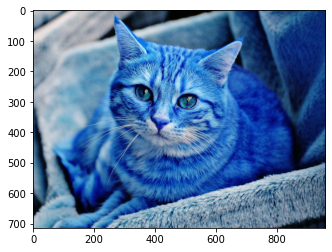

In [2]:
from matplotlib import pyplot as plt
plt.imshow(image)
plt.show()

* When **cv2.imread()** function reads am image the color scale is in **BGR** format so everytime we are displaying the image we will be converting it back to **RGB** format

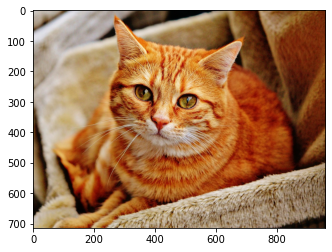

In [3]:
plt.imshow(image[:,:,::-1])
plt.show()

`cv2.waitKey()` is a keyboard binding function. Its argument is the time in milliseconds. The function waits for specified milliseconds for any keyboard event. If you press any key in that time, the program continues. If 0 is passed, it waits indefinitely for a key stroke. It can also be set to detect specific keystrokes like the Q key or the ESC key on the keyboard. 

`cv2.destroyAllWindows()` simply destroys all the windows we created. If you want to destroy any specific window, use the function `cv2.destroyWindow()` where you pass the exact window name as the argument.

In [4]:
w= cv2.waitKey(0)
if w == 27 or w == ord('q'):
    cv2.destroyAllWindows()

import numpy as np
pic = np.ones((1000,1000,3), dtype = 'uint8')

The function `cv2.imread()` is used to read an image. This function takes 2 arguments. The first argument is the image path. The image path can be just the name of the image if it is in the working directory else the full path needs to be specified.
The second argument is a flag that specifies the way the image should be read. There are 3 flag options:
1. `cv2.IMREAD_COLOR` : Loads a color image. Any transparency of image will be neglected. It is the default flag.
2. `cv2.IMREAD_GRAYSCALE` : Loads image in grayscale mode.
3. `cv2.IMREAD_UNCHANGED` : Loads image as such including alpha channel.

These flags can be used directly instead of using the integers 1, 0 and -1 respectively.

In [5]:
img_color = cv2.imread('image.jpg',1)
img_grayscale = cv2.imread('image.jpg',0)
img_unchanged = cv2.imread('image.jpg',-1)

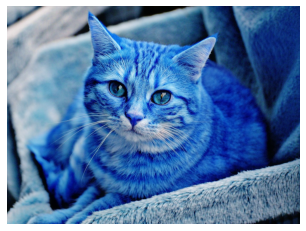

In [6]:
plt.imshow(img_color)
plt.axis("off")
plt.show()

The displayed image isn't as expected. This happens because OpenCV represents RGB images as multi-dimensional NumPy array but in the reverse order. This means that images are actually represented in BGR order rather than RGB. This can be corrected by converting BGR to RGB.

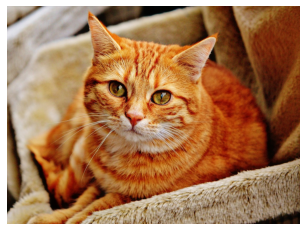

In [7]:
plt.axis("off")
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.show()

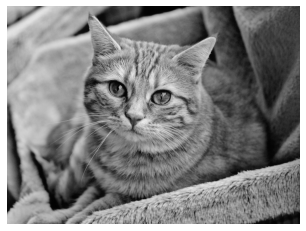

In [8]:
plt.imshow(cv2.cvtColor(img_grayscale, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

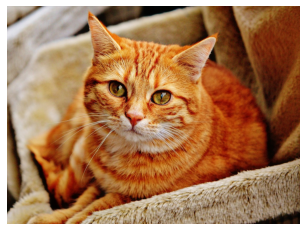

In [9]:
plt.imshow(cv2.cvtColor(img_unchanged, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [10]:
print(image.shape)

(714, 960, 3)


In [11]:
h,w,c = image.shape
print('Height:', h, 'Width:', w, 'Channel:', c)

Height: 714 Width: 960 Channel: 3


In [12]:
print(type(image))
print(image.dtype)
print(image)

<class 'numpy.ndarray'>
uint8
[[[193 198 197]
  [192 197 196]
  [192 196 197]
  ...
  [ 12  50 108]
  [  6  45 100]
  [ 11  50 105]]

 [[196 201 200]
  [195 200 199]
  [195 199 200]
  ...
  [  2  39  97]
  [ 10  47 105]
  [ 12  50 108]]

 [[197 201 202]
  [196 200 201]
  [196 199 203]
  ...
  [  2  36  96]
  [ 13  47 107]
  [ 11  47 107]]

 ...

 [[154 190 206]
  [153 192 207]
  [154 193 208]
  ...
  [  8  11  19]
  [  7  12  21]
  [  9  14  23]]

 [[153 191 209]
  [150 190 208]
  [150 190 208]
  ...
  [  7   9  19]
  [  4   8  19]
  [  7  11  22]]

 [[149 189 207]
  [149 189 207]
  [147 190 207]
  ...
  [  7   9  19]
  [  4   8  19]
  [  7  11  22]]]


##**Writing an image**
The function `cv2.imwrite()` is used to write an image.
It takes 2 arguments, first argument is the file name, second argument is the image you want to save. The below code will save the image in the working directory

In [13]:
cv2.imwrite('grayscale.png',img_grayscale)

True

##**Image Resizing**


#### Interpolation
* Different Interpolation methods are used for different functions   
 * **cv2.INTER_AREA** is best used for **shrinking** of Images because it resamples the image using pixel area relation as it gives more free results. When used for zooming into the image, it uses the INTER_NEAREST method. 
 * **cv2.INTER_CUBIC** (slow) is  best used for **zooming** of the Image , it uses a bicubic interpolation over **4x4 pixel** neighborhood. While resizing and interpolating new pixels, this method acts on the 4×4 neighboring pixels of the image. It then takes the weights average of the 16 pixels to create the new interpolated pixel.

 * **cv2.INTER_LINEAR**  uses a bilinear interpolation and is  used for all resizing purposes, hence it is used as **default** in many resizing functions. This method is somewhat similar to the INTER_CUBIC interpolation. But unlike INTER_CUBIC, this uses 2×2 neighboring pixels to get the weighted average for the interpolated pixel.

 * **cv2.INTER_NEAREST** method uses the nearest neighbor concept for interpolation. This is one of the simplest methods, using only one neighboring pixel from the image for interpolation.  If you prefer speed over quality use a **Nearest Neighbor method** but if you want to preserve the quality after downsampling then **interpolation** is a better option but it also depends on image content.

###**Resize by specifying new width and height**

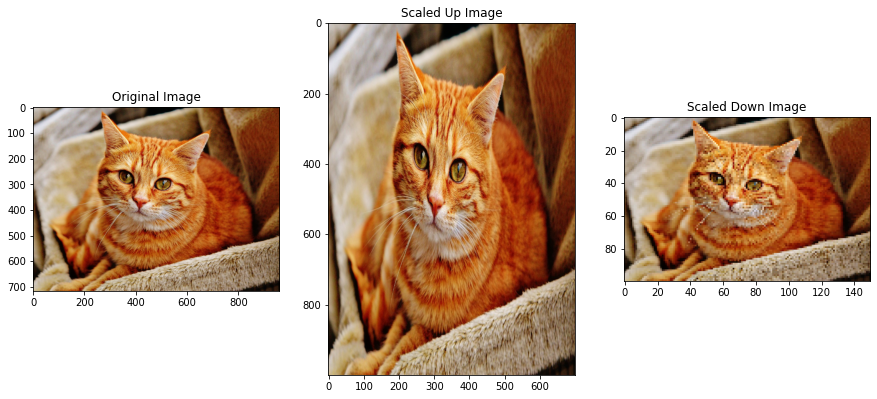

In [14]:
down_Width = 150
down_Height = 100
down_Points = (down_Width, down_Height)
resized_Down = cv2.resize(image, down_Points, interpolation= cv2.INTER_LINEAR)

up_Width = 700
up_Height = 1000
up_Points = (up_Width, up_Height)
resized_Up = cv2.resize(image, up_Points, interpolation= cv2.INTER_LINEAR)

plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(132);plt.imshow(resized_Up[:,:,::-1]);plt.title("Scaled Up Image")
plt.subplot(133);plt.imshow(resized_Down[:,:,::-1]);plt.title("Scaled Down Image")
plt.show()

###**Resize by Specifying the Scaling Factor**

Text(0.5, 1.0, 'Scaled Up Image, size = (1071, 1440)')

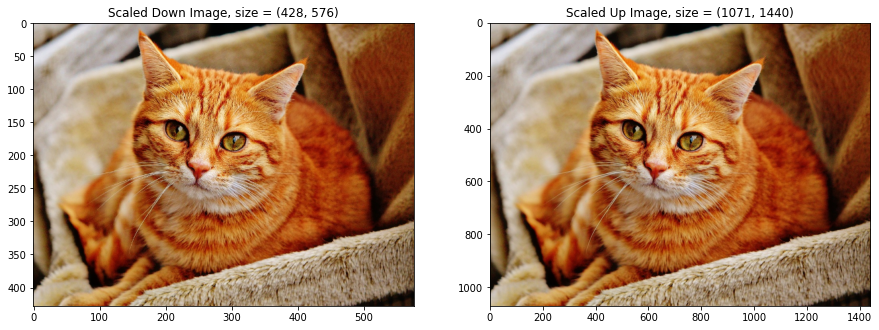

In [15]:
#scaling Up factor
scale_Up_X = 1.5
scale_Up_Y = 1.5

#scaling Down factor 
scale_Down = 0.6

scaledDown = cv2.resize(image, None, fx= scale_Down, fy= scale_Down, interpolation= cv2.INTER_LINEAR)

scaledUp = cv2.resize(image, None, fx= scale_Up_X, fy= scale_Up_Y, interpolation= cv2.INTER_LINEAR)

#displaying image
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(scaledDown[...,::-1])
plt.title("Scaled Down Image, size = {}".format(scaledDown.shape[:2]))
plt.subplot(122);plt.imshow(scaledUp[...,::-1])
plt.title("Scaled Up Image, size = {}".format(scaledUp.shape[:2]))

##**Creating shapes**

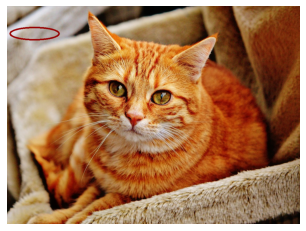

In [16]:
ellipse = cv2.ellipse(image, (90,90), (80,20), 0, 0, 360, (0,0,150), 3)
#cv2.imshow('image', ellipse)
#w= cv2.waitKey(0)
plt.imshow(cv2.cvtColor(ellipse, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

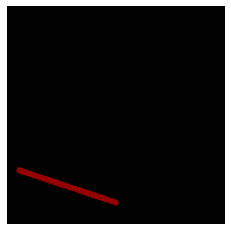

In [17]:
import numpy as np
pic = np.ones((200,200,3), dtype = 'uint8')
line = cv2.line(pic, (10,150), (100,180), (0,0,150), 3)
#cv2.imshow('image', line)
#w= cv2.waitKey(0)
plt.imshow(cv2.cvtColor(line, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

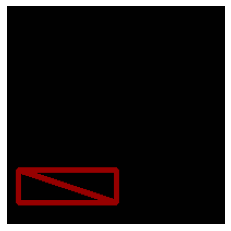

In [18]:
rect = cv2.rectangle(pic, (10,150), (100,180), (0,0,150), 3)
#cv2.imshow('image', rect)
#w= cv2.waitKey(0)
plt.imshow(cv2.cvtColor(rect, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

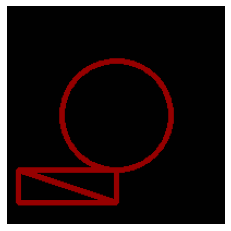

In [19]:
circle = cv2.circle(pic, (100,100), 50, (0,0,150), 3 )
#cv2.imshow('image', circle)
#w= cv2.waitKey(0)
plt.imshow(cv2.cvtColor(circle, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

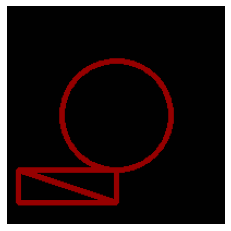

In [20]:
rect = cv2.rectangle(pic,(100, 150), (100,180), (0,0,150), 3 )
#cv2.imshow('image', rect)
#w= cv2.waitKey(0)
plt.imshow(cv2.cvtColor(rect, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()